# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

## Business Context

 - The program used to create the data simulates how people make purchasing decisions and how those decisions are influenced by promotional offers.
 
 - Each person in the simulation has some hidden traits that influence their purchasing patterns and are associated with their observable traits. People produce various events, including receiving offers, opening offers, and making purchases.
 
 - As a simplification, there are no explicit products to track. Only the amounts of each transaction or offer are recorded.

## Problem Statement
Based on the context above, this project will try to ask the questions below

 - What are the main features influencing the effectiveness of an offer on the Starbucks app?

 - Could the data provided, namely offer characteristics and user demographics, predict whether a user would take up an offer?

To accomplish this, the following approaches were conducted:

 - Data preprocessing and cleaning

 - Exploratory data analysis (EDA)

 - Build machine learning models

 - Evaluate the performance

# Data Exploration


To analyze better the problem in the next sections, we first need to explore the datasets which includes checking the missing value, visualizing the data distribution, etc. In that way, we can have a better understanding of how the dataset looks like and how we can featurize the data to make it ready for modelling.


In [1]:
import pandas as pd
import numpy as np
import math
import json
% matplotlib inline

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras

Using TensorFlow backend.


In [4]:
portfolio.head(1)


,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10


In [5]:
profile.head(1)


,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN


In [6]:
transcript.head(1)


,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}


# Data Accessing and Cleaning :


## Portfolio Data


In [7]:
portfolio.shape


(10, 6)

In [8]:
portfolio.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
channels      10 non-null object
difficulty    10 non-null int64
duration      10 non-null int64
id            10 non-null object
offer_type    10 non-null object
reward        10 non-null int64
dtypes: int64(3), object(3)
memory usage: 560.0+ bytes


#### Some dataset statistics or properties:

In [9]:
portfolio.describe()


,difficulty,duration,reward
count,10.000000,10.000000,10.000000
mean,7.700000,6.500000,4.200000
std,5.831905,2.321398,3.583915
min,0.000000,3.000000,0.000000
25%,5.000000,5.000000,2.000000
50%,8.500000,7.000000,4.000000
75%,10.000000,7.000000,5.000000
max,20.000000,10.000000,10.000000


In [10]:
portfolio['channels']


0         [email, mobile, social]
1    [web, email, mobile, social]
2            [web, email, mobile]
3            [web, email, mobile]
4                    [web, email]
5    [web, email, mobile, social]
6    [web, email, mobile, social]
7         [email, mobile, social]
8    [web, email, mobile, social]
9            [web, email, mobile]
Name: channels, dtype: object

### - Data Cleaning


In [11]:
df1 = portfolio.copy()


In [12]:
dummy = pd.get_dummies(df1.channels.apply(pd.Series).stack()).sum(level=0)
df1 = pd.concat([df1, dummy], axis=1)
df1 = df1.drop(columns='channels')

In [13]:
df1 = df1.rename(columns={'id':'offer_id'})


In [14]:
df1


,difficulty,duration,offer_id,offer_type,reward,email,mobile,social,web
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,1,1,1,0
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1,1,1,1
2,0,4,3f207df678b143eea3cee63160fa8bed,informational,0,1,1,0,1
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1,1,0,1
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,1,0,0,1
5,7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3,1,1,1,1
6,10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2,1,1,1,1
7,0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0,1,1,1,0
8,5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5,1,1,1,1
9,10,7,2906b810c7d4411798c6938adc9daaa5,discount,2,1,1,0,1


## 2. Profile Data


In [15]:
profile.shape


(17000, 5)

In [16]:
profile.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
age                 17000 non-null int64
became_member_on    17000 non-null int64
gender              14825 non-null object
id                  17000 non-null object
income              14825 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.1+ KB


#### Some dataset statistics or properties:

In [17]:
profile.describe()


,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


In [18]:
profile.duplicated().sum()


0

### - Data Cleaning

In [19]:
df2 = profile.copy()


In [20]:
df2['became_member_on'] = pd.to_datetime(df2['became_member_on'], format='%Y%m%d')


In [21]:
df2 = df2.rename(columns={'id':'customer_id'})


In [22]:
df2.head(10)


,age,became_member_on,gender,customer_id,income
0,118,2017-02-12,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,2018-07-12,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,2017-05-09,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,2017-08-04,None,a03223e636434f42ac4c3df47e8bac43,NaN
5,68,2018-04-26,M,e2127556f4f64592b11af22de27a7932,70000.0
6,118,2017-09-25,None,8ec6ce2a7e7949b1bf142def7d0e0586,NaN
7,118,2017-10-02,None,68617ca6246f4fbc85e91a2a49552598,NaN
8,65,2018-02-09,M,389bc3fa690240e798340f5a15918d5c,53000.0
9,118,2016-11-22,None,8974fc5686fe429db53ddde067b88302,NaN


In [23]:
type(df2.became_member_on[0])


pandas._libs.tslibs.timestamps.Timestamp

## 3. Transcript Data

In [24]:
transcript.head()


,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [25]:
transcript.shape


(306534, 4)

In [26]:
transcript.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
event     306534 non-null object
person    306534 non-null object
time      306534 non-null int64
value     306534 non-null object
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


#### Some dataset statistics or properties:

In [27]:
transcript.describe()


,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


In [28]:
transcript['value']


0          {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1          {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2          {'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3          {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4          {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}
5          {'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}
6          {'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'}
7          {'offer id': '3f207df678b143eea3cee63160fa8bed'}
8          {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
9          {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
10         {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
11         {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
12         {'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'}
13         {'offer id': '3f207df678b143eea3cee63160fa8bed'}
14         {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
15         {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
16         {'offer id': '0b1e1539f2cc45b

In [29]:
transcript['value'].value_counts()   

{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'}                  14983
{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}                  14924
{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}                  14891
{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}                  14835
{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'}                  14374
{'offer id': '5a8bc65990b245e5a138643cd4eb9837'}                  14305
{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}                  11848
{'offer id': '3f207df678b143eea3cee63160fa8bed'}                  11761
{'offer id': '2906b810c7d4411798c6938adc9daaa5'}                  11750
{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}                  10331
{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4', 'reward': 2}      5317
{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2', 'reward': 3}      5156
{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9', 'reward': 5}      4354
{'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d', 'reward': 5}   

In [30]:
transcript['event'].unique()


array(['offer received', 'offer viewed', 'transaction', 'offer completed'], dtype=object)

In [31]:
transcript['event'].value_counts()


transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

### - Data Cleaning

In [32]:
df3 = transcript.copy()


In [33]:
df3 = df3.rename(columns={'person':'customer_id'})


In [34]:
df3['event'] = df3['event'].str.replace(' ', '-')


In [35]:
df3['event'].value_counts()


transaction        138953
offer-received      76277
offer-viewed        57725
offer-completed     33579
Name: event, dtype: int64

In [36]:
dummy = pd.get_dummies(df3['event'])
df3 = pd.concat([df3, dummy], axis=1 )

In [37]:

df3['offer_id'] = [[*i.values()][0]if [*i.keys()][0] in ['offer id','offer_id'] else None for i in df3.value]
df3['amount'] = [np.round([*i.values()][0], decimals=2)if [*i.keys()][0] == 'amount' else None for i in df3.value]

In [38]:
df3 = df3.drop(columns='value')


### - Data Cleaning :

In [39]:
t_p = pd.merge(df3, df2, on='customer_id')


In [40]:
t_p

,event,customer_id,time,offer-completed,offer-received,offer-viewed,transaction,offer_id,amount,age,became_member_on,gender,income
0,offer-received,78afa995795e4d85b5d9ceeca43f5fef,0,0,1,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,75,2017-05-09,F,100000.0
1,offer-viewed,78afa995795e4d85b5d9ceeca43f5fef,6,0,0,1,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,75,2017-05-09,F,100000.0
2,transaction,78afa995795e4d85b5d9ceeca43f5fef,132,0,0,0,1,None,19.89,75,2017-05-09,F,100000.0
3,offer-completed,78afa995795e4d85b5d9ceeca43f5fef,132,1,0,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,75,2017-05-09,F,100000.0
4,transaction,78afa995795e4d85b5d9ceeca43f5fef,144,0,0,0,1,None,17.78,75,2017-05-09,F,100000.0
5,offer-received,78afa995795e4d85b5d9ceeca43f5fef,168,0,1,0,0,5a8bc65990b245e5a138643cd4eb9837,NaN,75,2017-05-09,F,100000.0
6,offer-viewed,78afa995795e4d85b5d9ceeca43f5fef,216,0,0,1,0,5a8bc65990b245e5a138643cd4eb9837,NaN,75,2017-05-09,F,100000.0
7,transaction,78afa995795e4d85b5d9ceeca43f5fef,222,0,0,0,1,None,19.67,75,2017-05-09,F,100000.0
8,transaction,78afa995795e4d85b5d9ceeca43f5fef,240,0,0,0,1,None,29.72,75,2017-05-09,F,100000.0
9,transaction,78afa995795e4d85b5d9ceeca43f5fef,378,0,0,0,1,None,23.93,75,2017-05-09,F,100000.0


In [41]:
df = pd.merge(t_p, df1, on='offer_id', how='left')
df

,event,customer_id,time,offer-completed,offer-received,offer-viewed,transaction,offer_id,amount,age,...,gender,income,difficulty,duration,offer_type,reward,email,mobile,social,web
0,offer-received,78afa995795e4d85b5d9ceeca43f5fef,0,0,1,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,75,...,F,100000.0,5.0,7.0,bogo,5.0,1.0,1.0,0.0,1.0
1,offer-viewed,78afa995795e4d85b5d9ceeca43f5fef,6,0,0,1,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,75,...,F,100000.0,5.0,7.0,bogo,5.0,1.0,1.0,0.0,1.0
2,transaction,78afa995795e4d85b5d9ceeca43f5fef,132,0,0,0,1,None,19.89,75,...,F,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,offer-completed,78afa995795e4d85b5d9ceeca43f5fef,132,1,0,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,75,...,F,100000.0,5.0,7.0,bogo,5.0,1.0,1.0,0.0,1.0
4,transaction,78afa995795e4d85b5d9ceeca43f5fef,144,0,0,0,1,None,17.78,75,...,F,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,offer-received,78afa995795e4d85b5d9ceeca43f5fef,168,0,1,0,0,5a8bc65990b245e5a138643cd4eb9837,NaN,75,...,F,100000.0,0.0,3.0,informational,0.0,1.0,1.0,1.0,0.0
6,offer-viewed,78afa995795e4d85b5d9ceeca43f5fef,216,0,0,1,0,5a8bc65990b245e5a138643cd4eb9837,NaN,75,...,F,100000.0,0.0,3.0,informational,0.0,1.0,1.0,1.0,0.0
7,transaction,78afa995795e4d85b5d9ceeca43f5fef,222,0,0,0,1,None,19.67,75,...,F,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,transaction,78afa995795e4d85b5d9ceeca43f5fef,240,0,0,0,1,None,29.72,75,...,F,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,transaction,78afa995795e4d85b5d9ceeca43f5fef,378,0,0,0,1,None,23.93,75,...,F,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
offer_id = df['offer_id'].unique()

In [43]:
offer_dict = pd.Series(offer_id ).to_dict()

In [44]:
offer_dict = dict([(value, key) for key, value in offer_dict.items()]) 

In [45]:
df['offer_id'] = df['offer_id'].map(offer_dict)

In [46]:
df['offer_id'] = df['offer_id'].replace(1, np.nan)

In [47]:
df.head()


,event,customer_id,time,offer-completed,offer-received,offer-viewed,transaction,offer_id,amount,age,...,gender,income,difficulty,duration,offer_type,reward,email,mobile,social,web
0,offer-received,78afa995795e4d85b5d9ceeca43f5fef,0,0,1,0,0,0.0,NaN,75,...,F,100000.0,5.0,7.0,bogo,5.0,1.0,1.0,0.0,1.0
1,offer-viewed,78afa995795e4d85b5d9ceeca43f5fef,6,0,0,1,0,0.0,NaN,75,...,F,100000.0,5.0,7.0,bogo,5.0,1.0,1.0,0.0,1.0
2,transaction,78afa995795e4d85b5d9ceeca43f5fef,132,0,0,0,1,NaN,19.89,75,...,F,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,offer-completed,78afa995795e4d85b5d9ceeca43f5fef,132,1,0,0,0,0.0,NaN,75,...,F,100000.0,5.0,7.0,bogo,5.0,1.0,1.0,0.0,1.0
4,transaction,78afa995795e4d85b5d9ceeca43f5fef,144,0,0,0,1,NaN,17.78,75,...,F,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
df['offer_id'].unique()


array([  0.,  nan,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

In [96]:
event_ids = df['event'].unique()
event_ids


array(['offer-received', 'offer-viewed', 'transaction', 'offer-completed'], dtype=object)

In [97]:
event_dict = pd.Series(event_ids).to_dict()
event_dict

event_dict = dict([(value, key) for key, value in event_dict.items()]) 
event_dict


{'offer-received': 0,
 'offer-viewed': 1,
 'transaction': 2,
 'offer-completed': 3}

In [98]:
df['event_id'] = df['event'].map(event_dict)
df.head()

,event,customer_id,time,offer-completed,offer-received,offer-viewed,transaction,offer_id,amount,age,...,income,difficulty,duration,offer_type,reward,email,mobile,social,web,event_id
0,offer-received,78afa995795e4d85b5d9ceeca43f5fef,0,0,1,0,0,0.0,NaN,75,...,100000.0,5.0,7.0,bogo,5.0,1.0,1.0,0.0,1.0,0
1,offer-viewed,78afa995795e4d85b5d9ceeca43f5fef,6,0,0,1,0,0.0,NaN,75,...,100000.0,5.0,7.0,bogo,5.0,1.0,1.0,0.0,1.0,1
2,transaction,78afa995795e4d85b5d9ceeca43f5fef,132,0,0,0,1,NaN,19.89,75,...,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,offer-completed,78afa995795e4d85b5d9ceeca43f5fef,132,1,0,0,0,0.0,NaN,75,...,100000.0,5.0,7.0,bogo,5.0,1.0,1.0,0.0,1.0,3
4,transaction,78afa995795e4d85b5d9ceeca43f5fef,144,0,0,0,1,NaN,17.78,75,...,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [99]:
df.shape


(306534, 22)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306534 entries, 0 to 306533
Data columns (total 22 columns):
event               306534 non-null object
customer_id         306534 non-null object
time                306534 non-null int64
offer-completed     306534 non-null uint8
offer-received      306534 non-null uint8
offer-viewed        306534 non-null uint8
transaction         306534 non-null uint8
offer_id            167581 non-null float64
amount              138953 non-null float64
age                 306534 non-null int64
became_member_on    306534 non-null datetime64[ns]
gender              272762 non-null object
income              272762 non-null float64
difficulty          167581 non-null float64
duration            167581 non-null float64
offer_type          167581 non-null object
reward              167581 non-null float64
email               167581 non-null float64
mobile              167581 non-null float64
social              167581 non-null float64
web               

In [101]:
df.to_csv('data/data.csv', index=False)


In [102]:
data = pd.read_csv('data/data.csv')


# Data Exploration and Data Visualization

### Age:

In [103]:
data.age.describe()


count    306534.000000
mean         60.909367
std          26.032030
min          18.000000
25%          43.000000
50%          57.000000
75%          72.000000
max         118.000000
Name: age, dtype: float64

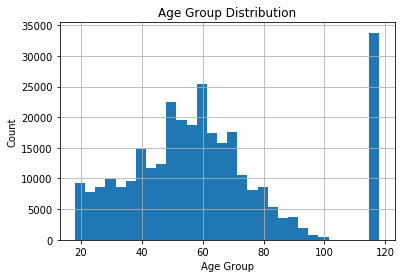

In [104]:

data.age.hist(bins = 30)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Group Distribution');

### Observation :
● Outlier is present Age > 115 is present is a high amount , which does not
make sense.

● Average Aged user is middle age ie. around 50-62 years

### Income range distribution:

In [105]:
data.income.describe()


count    272762.000000
mean      64337.000755
std       21243.762941
min       30000.000000
25%       48000.000000
50%       62000.000000
75%       78000.000000
max      120000.000000
Name: income, dtype: float64

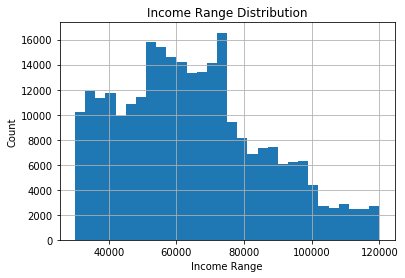

In [106]:
data.income.hist(bins = 30);
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.title('Income Range Distribution');

### Observation :

● Average income user is middle income group ie. 65000-70000me user is middle income group ie. 65000-70000


### Gender:

In [107]:
data.gender.value_counts()


M    155690
F    113101
O      3971
Name: gender, dtype: int64

In [108]:
male_proportion  = data.gender.value_counts()[0] / data.shape[0]*100
female_proportion = data.gender.value_counts()[1] / data.shape[0]*100
others_proportion = data.gender.value_counts()[2] / data.shape[0]*100

male_proportion ,female_proportion ,others_proportion

(50.790450651477492, 36.896722712651773, 1.2954517280301696)

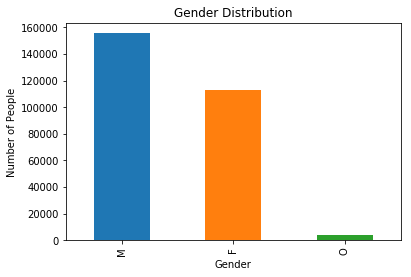

In [109]:
ax = data.gender.value_counts()
ax.plot(kind='bar')
plt.ylabel('Number of People')
plt.xlabel('Gender')
plt.title('Gender Distribution');

### Observation :

● Males are more than 50 percent of users.

male_proportion = 50.79045065147749

female_proportion = 36.89672271265177,

### Type of offer:

In [110]:
offer_received = data[data['offer-received'] == 1].offer_type.value_counts()
offer_viewed = data[data['offer-viewed'] == 1].offer_type.value_counts()
offer_completed = data[data['offer-completed'] == 1].offer_type.value_counts()

offer_received , offer_viewed , offer_completed

(discount         30543
 bogo             30499
 informational    15235
 Name: offer_type, dtype: int64, bogo             25449
 discount         21445
 informational    10831
 Name: offer_type, dtype: int64, discount    17910
 bogo        15669
 Name: offer_type, dtype: int64)

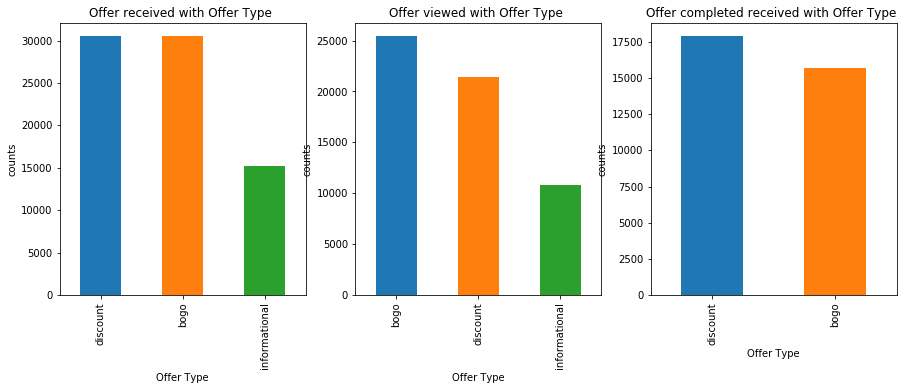

In [111]:
plt.subplot(131)
offer_received = data[data['offer-received'] == 1].offer_type.value_counts()
offer_received.plot(kind='bar', figsize=(15,5))
plt.ylabel('counts')
plt.xlabel('Offer Type')
plt.title('Offer received with Offer Type ');

plt.subplot(132)
offer_viewed = data[data['offer-viewed'] == 1].offer_type.value_counts()
offer_viewed.plot(kind='bar' , figsize=(15,5))
plt.ylabel('counts')
plt.xlabel('Offer Type')
plt.title('Offer viewed with Offer Type ');

plt.subplot(133)
offer_completed = data[data['offer-completed'] == 1].offer_type.value_counts()
offer_completed.plot(kind='bar' , figsize=(15,5))
plt.ylabel('counts')
plt.xlabel('Offer Type')
plt.title('Offer completed received with Offer Type ');

### Observation :

● BOGO offers are highly demanding , 30499 users received BOGO offers, 25449
viewed the offer and 15669 completed it.

● The percentage of BOGO Offer viewers is 83 percent.

● The percentage of DISCOUNT Offer viewers is 70 percent.

For BOGO Offer :

Offer _Viewed_proportion = 83.44%

Offer_Completed_proportion = 51.37%

In [112]:
# For BOGO Offer :

R = offer_received[1] 
V = offer_viewed[0] 
C = offer_completed[1] 

view_prop = V/R
com_prop = C/R
R , V , C , view_prop , com_prop

(30499, 25449, 15669, 0.83442080068198954, 0.51375454932948617)

In [113]:
# For DISCOUNT Offer :

R = offer_received[0] 
V = offer_viewed[1] 
C = offer_completed[0] 

view_prop = V/R
com_prop = C/R
R , V , C , view_prop , com_prop

(30543, 21445, 17910, 0.70212487312968597, 0.5863864060504862)

##### BOGO offers are highly demanding, the percentage of BOGO Offer viewer is 83 percent . The percentage of DISCOUNT Offer viewer is 70 percent.

In [114]:

offer_received = data[data['offer-received'] == 1].offer_id.value_counts()
offer_viewed = data[data['offer-viewed'] == 1].offer_id.value_counts()
offer_completed = data[data['offer-completed'] == 1].offer_id.value_counts()

offer_received , offer_viewed , offer_completed

(0.0     7677
 5.0     7668
 3.0     7658
 10.0    7646
 7.0     7632
 2.0     7618
 6.0     7617
 8.0     7597
 9.0     7593
 4.0     7571
 Name: offer_id, dtype: int64, 10.0    7337
 8.0     7327
 9.0     7298
 4.0     7264
 3.0     6716
 2.0     6687
 0.0     4171
 6.0     4144
 7.0     4118
 5.0     2663
 Name: offer_id, dtype: int64, 8.0     5317
 10.0    5156
 0.0     4354
 4.0     4296
 7.0     4017
 3.0     3688
 5.0     3420
 9.0     3331
 Name: offer_id, dtype: int64)

### Offer viewed with Offer Id:

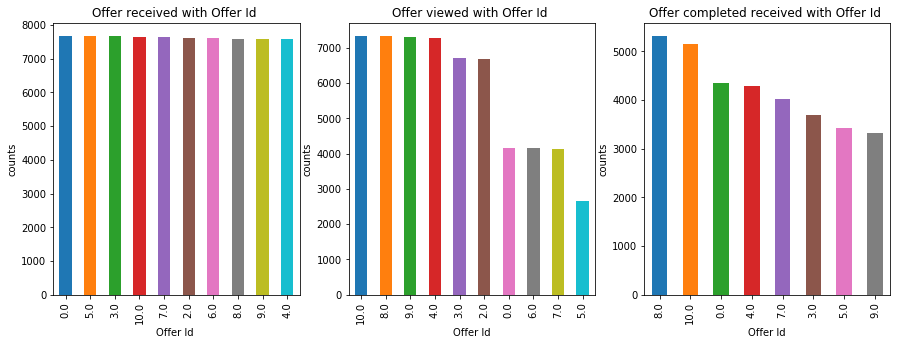

In [115]:
plt.subplot(131)
offer_received = data[data['offer-received'] == 1].offer_id.value_counts()
offer_received.plot(kind='bar', figsize=(15,5))
plt.ylabel('counts')
plt.xlabel('Offer Id ')
plt.title('Offer received with Offer Id ');

plt.subplot(132)
offer_viewed = data[data['offer-viewed'] == 1].offer_id.value_counts()
offer_viewed.plot(kind='bar' , figsize=(15,5))
plt.ylabel('counts')
plt.xlabel('Offer Id')
plt.title('Offer viewed with Offer Id ');

plt.subplot(133)
offer_completed = data[data['offer-completed'] == 1].offer_id.value_counts()
offer_completed.plot(kind='bar' , figsize=(15,5))
plt.ylabel('counts')
plt.xlabel('Offer Id')
plt.title('Offer completed received with Offer Id ');

### Observation :
● Every offer_id received eual offers.

● Viewing ratio decreased for some offer_ids like 0 , 6 , 7 , 5

● Offer completed ration is quite decent.

### Discount Offer Received by User:

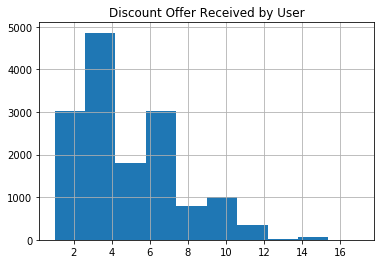

In [116]:
data[data['offer_type']=='discount'].groupby('customer_id')['offer-completed'].count()
data[data['offer_type']=='discount'].groupby('customer_id')['offer-completed'].count().hist();
plt.title('Discount Offer Received by User');

# Modeling and Predictions :


#### Map genders and select columns

In [147]:
genders = {'O': 0, 'M': 1, 'F': 2}
data['gender'] = data['gender'].map(genders)

In [148]:
data.offer_type.value_counts()


0.0    71617
1.0    69898
2.0    26066
Name: offer_type, dtype: int64

In [149]:
offers = {'bogo': 0, 'discount': 1, 'informational': 2}
data['offer_type'] = data['offer_type'].map(offers)
data.head()

,event,customer_id,time,offer-completed,offer-received,offer-viewed,transaction,offer_id,amount,age,...,income,difficulty,duration,offer_type,reward,email,mobile,social,web,event_id
0,offer-received,78afa995795e4d85b5d9ceeca43f5fef,0,0,1,0,0,0.0,NaN,75,...,100000.0,5.0,7.0,NaN,5.0,1.0,1.0,0.0,1.0,0
1,offer-viewed,78afa995795e4d85b5d9ceeca43f5fef,6,0,0,1,0,0.0,NaN,75,...,100000.0,5.0,7.0,NaN,5.0,1.0,1.0,0.0,1.0,1
2,transaction,78afa995795e4d85b5d9ceeca43f5fef,132,0,0,0,1,NaN,19.89,75,...,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,offer-completed,78afa995795e4d85b5d9ceeca43f5fef,132,1,0,0,0,0.0,NaN,75,...,100000.0,5.0,7.0,NaN,5.0,1.0,1.0,0.0,1.0,3
4,transaction,78afa995795e4d85b5d9ceeca43f5fef,144,0,0,0,1,NaN,17.78,75,...,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [150]:
data.columns


Index(['event', 'customer_id', 'time', 'offer-completed', 'offer-received',
       'offer-viewed', 'transaction', 'offer_id', 'amount', 'age',
       'became_member_on', 'gender', 'income', 'difficulty', 'duration',
       'offer_type', 'reward', 'email', 'mobile', 'social', 'web', 'event_id'],
      dtype='object')

In [151]:
X = data.drop(['customer_id', 'event_id' , 'event' , 'became_member_on','offer-completed', 'offer-received',
       'offer-viewed', 'transaction'], axis=1)
Y = data['event_id']
X.head()

,time,offer_id,amount,age,gender,income,difficulty,duration,offer_type,reward,email,mobile,social,web
0,0,0.0,NaN,75,NaN,100000.0,5.0,7.0,NaN,5.0,1.0,1.0,0.0,1.0
1,6,0.0,NaN,75,NaN,100000.0,5.0,7.0,NaN,5.0,1.0,1.0,0.0,1.0
2,132,NaN,19.89,75,NaN,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,132,0.0,NaN,75,NaN,100000.0,5.0,7.0,NaN,5.0,1.0,1.0,0.0,1.0
4,144,NaN,17.78,75,NaN,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
Y.head()

0    0
1    1
2    2
3    3
4    2
Name: event_id, dtype: int64

In [153]:
X.shape , Y.shape


((306534, 14), (306534,))

## Feature Scaling :


#### Create X train, X test, y train, y test


In [154]:
class_name =['offer recieved', 'offer viewed', 'transaction', 'offer completed']

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [156]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((214573, 14), (91961, 14), (214573,), (91961,))

In [174]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

### Build a model

In [171]:
ann = keras.models.Sequential()


ann.add(keras.layers.Dense(32, input_dim=7, kernel_initializer = 'normal' ,activation='relu'))
ann.add(keras.layers.Dense(15, kernel_initializer = 'normal' ,activation='relu'))
ann.add(keras.layers.Dense(10, kernel_initializer = 'normal' ,activation='relu'))
ann.add(keras.layers.Dense(6, kernel_initializer = 'normal' ,activation='relu'))
ann.add(keras.layers.Dense(4, kernel_initializer = 'normal' ,activation = 'softmax'))

In [172]:
ann.compile(optimizer = 'adam', 
            loss = 'sparse_categorical_crossentropy', 
            metrics = ['accuracy'])

In [175]:
ann_history = ann.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=100 , verbose = 2)

Train on 214573 samples, validate on 91961 samples
Epoch 1/15
 - 4s - loss: nan - acc: 0.2481 - val_loss: nan - val_acc: 0.2507
Epoch 2/15
 - 3s - loss: nan - acc: 0.2481 - val_loss: nan - val_acc: 0.2507
Epoch 3/15
 - 3s - loss: nan - acc: 0.2481 - val_loss: nan - val_acc: 0.2507
Epoch 4/15
 - 3s - loss: nan - acc: 0.2481 - val_loss: nan - val_acc: 0.2507
Epoch 5/15
 - 3s - loss: nan - acc: 0.2481 - val_loss: nan - val_acc: 0.2507
Epoch 6/15
 - 4s - loss: nan - acc: 0.2481 - val_loss: nan - val_acc: 0.2507
Epoch 7/15
 - 3s - loss: nan - acc: 0.2481 - val_loss: nan - val_acc: 0.2507
Epoch 8/15
 - 3s - loss: nan - acc: 0.2481 - val_loss: nan - val_acc: 0.2507
Epoch 9/15
 - 3s - loss: nan - acc: 0.2481 - val_loss: nan - val_acc: 0.2507
Epoch 10/15
 - 3s - loss: nan - acc: 0.2481 - val_loss: nan - val_acc: 0.2507
Epoch 11/15
 - 3s - loss: nan - acc: 0.2481 - val_loss: nan - val_acc: 0.2507
Epoch 12/15
 - 3s - loss: nan - acc: 0.2481 - val_loss: nan - val_acc: 0.2507
Epoch 13/15
 - 3s - lo

In [176]:
ann.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                256       
_________________________________________________________________
dense_7 (Dense)              (None, 15)                495       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 66        
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 28        
Total params: 1,005
Trainable params: 1,005
Non-trainable params: 0
_________________________________________________________________


# Model Validation and Evaluation

In [179]:
ann.evaluate(X_test , y_test)


91961/91961 [==============================] - 2s 19us/step


[nan, 0.250660606125781]

In [180]:
# TO PERFORM OF CHECK THE RESULT IN NEW DATA SET
# AS WE DON'T HAVE NEW DATA SET , CREATE ONE FROM TEST DATA SET
# HOW TO PREDICT THE PROBABILITY and CLASSES IN UNSEEN DATA


x_new = X_test[:3]


In [181]:
# PROBABILITY OF EACH SET

y_prob = ann.predict(x_new)
y_prob.round(2)                        # RESULT IN 2 DECIMAL PLACE

array([[ nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan]], dtype=float32)

In [182]:
# CLASS OF EACH SET 

y_pred = ann.predict_classes(x_new)
y_pred

3/3 [==============================] - 0s 575us/step


array([0, 0, 0])

In [183]:
np.array(class_name)[y_pred]


array(['offer recieved', 'offer recieved', 'offer recieved'], 
      dtype='<U15')

# Conclusion:


- First of all, we saw that BOGO offers were highly demanding, the percentage of BOGO Offer viewer was 83 percent . The percentage of DISCOUNT Offer viewer was 70 percent.

- For gender predict: We can see that the model is not perfect, because the predicted genders are generally Male (almost 90%). However, given the few variables at the start, the result is not so bad, but we can ask ourselves if the low representation of women in the starting base is not the cause of this.

- The events are wrongly predicted as 'offer received'.

- Majority classes are performing well but the minorities are not. This is cause because of a problem of imbalanced dataset.

- Most of the events are wrongly predicted as 'offer received'; offer received is the most occuring event or class.

With this we can see that the precision method is not the most suitable for this data set, due to how unbalanced it is. It's important to say that I originally was going to only use the F₂ Score, but I realized I needed to look at multiple metrics to get a full picture. I discovered that on some models the F₂ Score was really high (~0.90), but the model marked everything as Positive (i.e. send the offer). This resulted in all TP and FP and no TN and FN.
We obtained a solid solution for the problem, as we commented in the Model Evaluation and Validation section. There were only 13 % of false positive i.e the customer did not accept the offer but was predicted as success and 5% of false negatives.

## Reflection and Improvements

We got solve the basic tasks in this project: identify which groups of people are most responsive to each type of offer, and how best to present each type of offer. 

The results shows that the model identifies 13 % of false positive i.e the customer did not accept the offer but was predicted as success and 5% of false negatives i.e customer accepted the offer but was predicted as fail.

However, the data provided, namely offer characteristics and user demographics could not predict whether a user would take up an offer. We had got an imbalanced dataset. This was the higher difficulty I had studying this datasets. To try to solve this problem, the dataset should be balance and should has more data. Also, for improve results we can:

 - The accuracy could be improved significantly usingdeep neural networks, or using recommendation engines. 

 - Also, removing some custom features from the dataset and evaluating the model would be interesting.
 
 - Concerning feature engineering, there could be features developed regarding how much the customer has spent before viewing offers.

From the result of the project, it's likely to use machine learning model to predict whether the customer will respond to the offer or not, and the model also shows the main factors such as the length of membership, age, income which highly affect the possibility of customer's responding to the offer. This was very useful to respond: what features influence the effectiveness of an offer on the Starbucks app?

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Starbucks_Capstone_notebook.ipynb'])

0